In [1]:
!mkdir dataset
!unzip mans/mans.zip -d mans
!unzip womans/womans.zip -d womans

Archive:  mans/mans.zip
  inflating: mans/th.jpg             
  inflating: mans/th10.jpg           
  inflating: mans/th100.jpg          
  inflating: mans/th101.jpg          
  inflating: mans/th102.jpg          
  inflating: mans/th103.jpg          
  inflating: mans/th104.jpg          
  inflating: mans/th105.jpg          
  inflating: mans/th106.jpg          
  inflating: mans/th107.jpg          
  inflating: mans/th108.jpg          
  inflating: mans/th109.jpg          
  inflating: mans/th11.jpg           
  inflating: mans/th110.jpg          
  inflating: mans/th111.jpg          
  inflating: mans/th112.jpg          
  inflating: mans/th113.jpg          
  inflating: mans/th114.jpg          
  inflating: mans/th115.jpg          
  inflating: mans/th116.jpg          
  inflating: mans/th117.jpg          
  inflating: mans/th118.jpg          
  inflating: mans/th119.jpg          
  inflating: mans/th12.jpg           
  inflating: mans/th120.jpg          
  inflating: mans/th121.jp

In [2]:
!rm mans/mans.zip
!rm womans/womans.zip

In [10]:
!cp -r mans /content/dataset
!cp -r womans /content/dataset

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=10. ,width_shift_range=0.15, height_shift_range=0.15, shear_range=5,
    zoom_range=[0.7,1.3],validation_split=0.2
)

datagen_train=datagen.flow_from_directory("/content/dataset",
                                          target_size=(224,224),
                                          batch_size=32,shuffle=True,
                                          subset="training"
                                          )

datagen_test=datagen.flow_from_directory("/content/dataset",
                                          target_size=(224,224),
                                          batch_size=32,shuffle=True,
                                          subset="validation"
                                          )


Found 702 images belonging to 2 classes.
Found 174 images belonging to 2 classes.


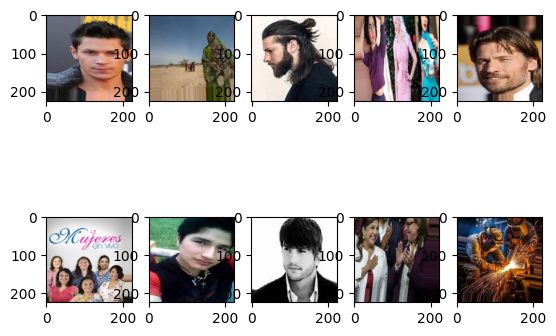

In [27]:
import matplotlib.pyplot as plt

for images,tags in datagen_train:
  for i in range(10):
    plt.subplot(2 ,5, i+1)
    plt.imshow(images[i])

  break

In [14]:
import tensorflow as tf
import tensorflow_hub as tfh

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = tfh.KerasLayer(url,input_shape=(224,224,3))

In [15]:
#freezing layers
mobilenetv2.trainable = False

In [16]:

model = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2,activation="softmax")
])

In [17]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [19]:
epochs = 20
train = model.fit(
    datagen_train, epochs=epochs, batch_size=32,validation_data=datagen_test

)

Epoch 1/20
22/22 [==============================] - 43s 2s/step - loss: 0.2808 - accuracy: 0.8903 - val_loss: 0.1853 - val_accuracy: 0.9425
Epoch 2/20
22/22 [==============================] - 43s 2s/step - loss: 0.2602 - accuracy: 0.8917 - val_loss: 0.1786 - val_accuracy: 0.9483
Epoch 3/20
22/22 [==============================] - 43s 2s/step - loss: 0.2426 - accuracy: 0.9017 - val_loss: 0.1671 - val_accuracy: 0.9483
Epoch 4/20
22/22 [==============================] - 37s 2s/step - loss: 0.2274 - accuracy: 0.9103 - val_loss: 0.1870 - val_accuracy: 0.9138
Epoch 5/20
22/22 [==============================] - 36s 2s/step - loss: 0.2334 - accuracy: 0.9074 - val_loss: 0.1639 - val_accuracy: 0.9540
Epoch 6/20
22/22 [==============================] - 42s 2s/step - loss: 0.2080 - accuracy: 0.9274 - val_loss: 0.1790 - val_accuracy: 0.9253
Epoch 7/20
22/22 [==============================] - 41s 2s/step - loss: 0.2092 - accuracy: 0.9088 - val_loss: 0.1815 - val_accuracy: 0.9195
Epoch 8/20
22/22 [==

In [28]:
from PIL import Image
import cv2

def category(rute):
  img = Image.open(rute)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img,(224,224))
  predict = model.predict(img.reshape(-1,224,224,3))
  return np.argmax(predict[0],axis=-1)

if category("wonderful_woman.jpeg") == 0:
  print("man")
else:
  print("woman")

1/1 [==============================] - 0s 54ms/step
woman
